In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False     # 음수 기호 깨짐 방지

# 데이터 로드
df = pd.read_csv("감자/감자(EDA용)_스케일링만.csv", encoding='cp949', parse_dates=["week_start"])
df['year'] = df['week_start'].dt.year
df['month'] = df['week_start'].dt.month
df['week'] = df['week_start'].dt.isocalendar().week

# 계절 컬럼 생성
def get_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'

df['season'] = df['month'].apply(get_season)

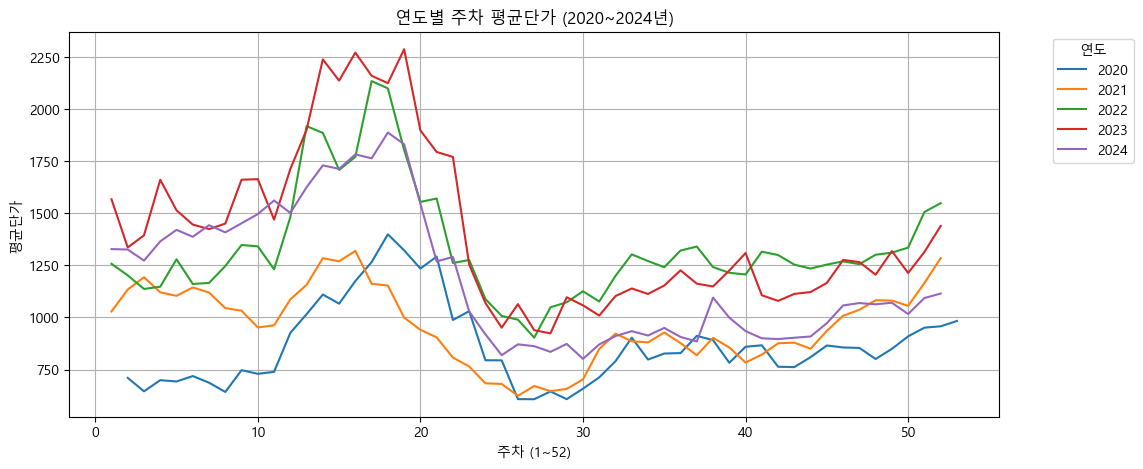

In [44]:
df_filtered = df[df['year'].between(2020, 2024)]

weekly_avg = df_filtered.groupby(['week', 'year'])['평균단가(원)'].mean().unstack()

weekly_avg.plot(figsize=(12, 5), title = "연도별 주차 평균단가 (2020~2024년)")
plt.xlabel("주차 (1~52)")
plt.ylabel("평균단가")
plt.legend(title='연도', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

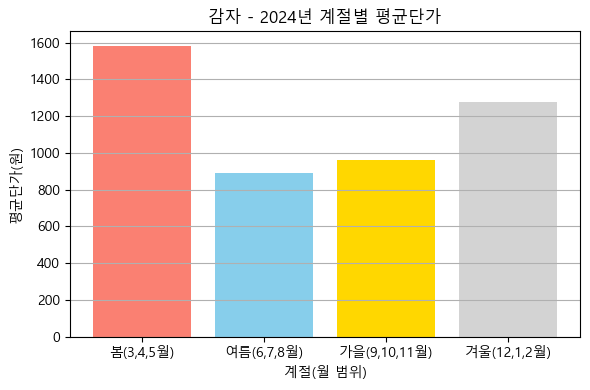

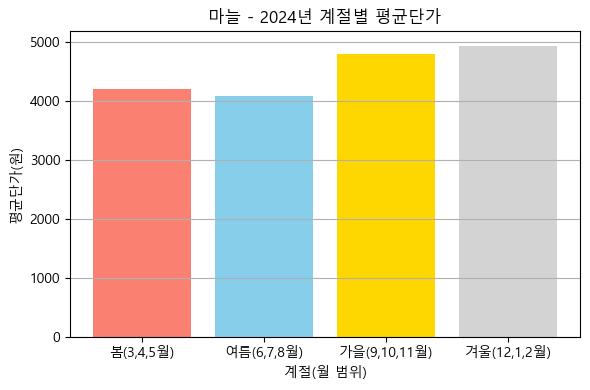

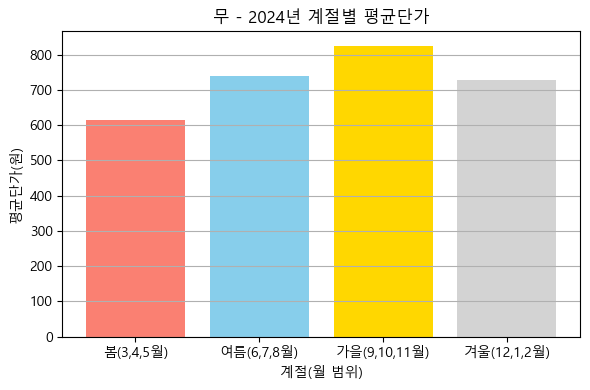

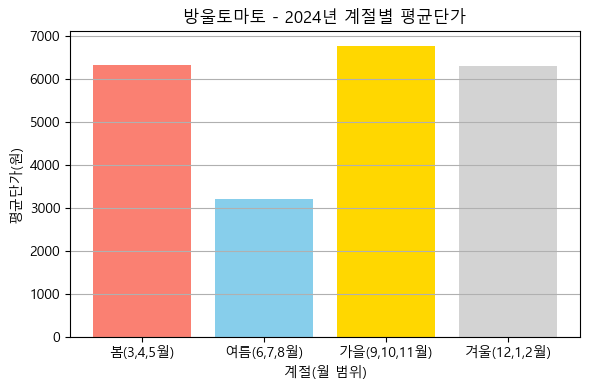

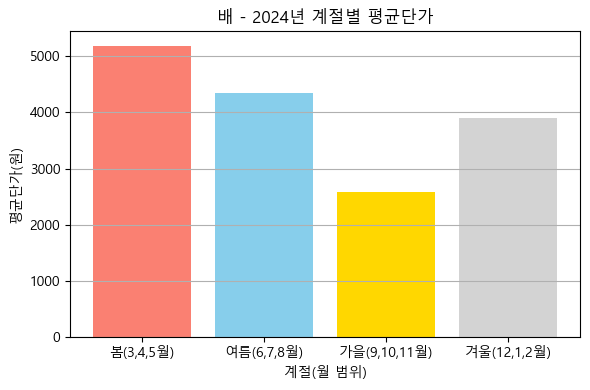

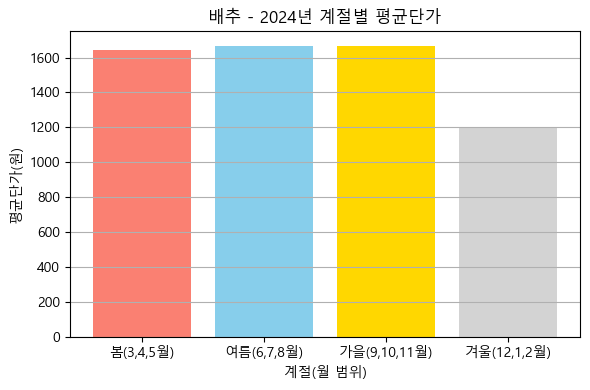

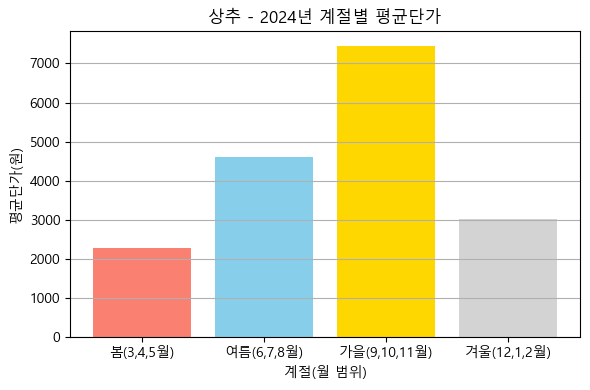

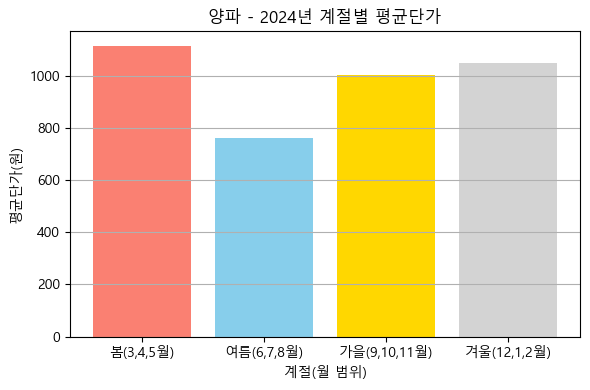

In [2]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.patches import Patch
import seaborn as sns
import re

plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False     # 음수 기호 깨짐 방지

file_list = glob.glob('EDA/*.csv')

def get_season(month):
    if month in [3, 4, 5]:
        return '봄'
    elif month in [6, 7, 8]:
        return '여름'
    elif month in [9, 10, 11]:
        return '가을'
    else:
        return '겨울'
    
season_legend = {
    '봄': '3,4,5월',
    '여름': '6,7,8월',
    '가을': '9,10,11월',
    '겨울': '12,1,2월'
}

# 계절별 색상
season_colors = {
    '봄': 'salmon',
    '여름': 'skyblue',
    '가을': 'gold',
    '겨울': 'lightgray'
}

for file_path in file_list:
    try:
        df = pd.read_csv(file_path, encoding = 'cp949', parse_dates=['week_start'])

        # 연도 및 주차 추출
        df['year'] = df['week_start'].dt.year
        df['month'] = df['week_start'].dt.month
        df['season'] = df['month'].apply(get_season)

        # 2024년만 필터링
        df_2024 = df[df['year'] == 2024]

        # 계절별 평균단가 계산
        seasonal_avg = df_2024.groupby('season')['평균단가(원)'].mean().reindex(['봄', '여름', '가을', '겨울'])

        # 품목명 추출 (파일명에서)
        filename = os.path.basename(file_path)
        item_name = re.split(r'\(', filename)[0]

        # 시각화
        plt.figure(figsize=(6, 4))

        seasons = seasonal_avg.index.tolist()
        values = seasonal_avg.values.tolist()
        colors = [season_colors[s] for s in seasons]

        # 막대 그리기
        plt.bar(range(len(seasons)), values, color=colors)

        # X축 레이블에 월 포함
        xtick_labels = [f"{s}({season_legend[s]})" for s in seasons]
        plt.xticks(ticks=range(len(seasons)), labels=xtick_labels, rotation=0)

        plt.title(f"{item_name.strip()} - 2024년 계절별 평균단가")
        plt.xlabel("계절(월 범위)")
        plt.ylabel("평균단가(원)")
        plt.grid(axis='y')
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"⚠️ 파일 처리 중 오류 발생: {file_path}")
        print(f"에러 내용: {e}")

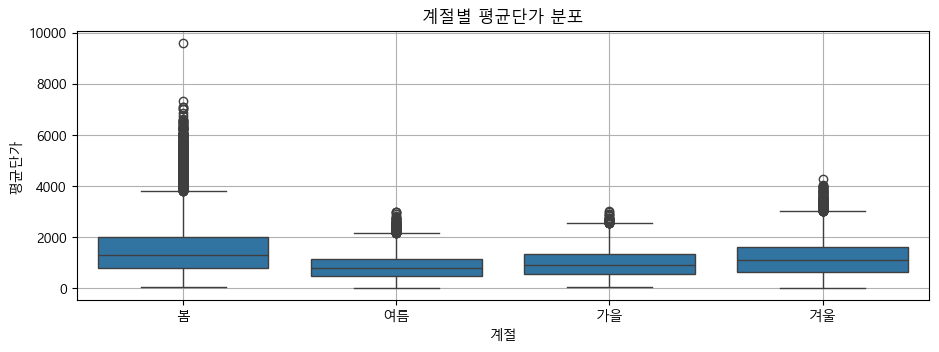

In [49]:
plt.figure(figsize=(11, 3.5))
sns.boxplot(x='season', y='평균단가(원)', data=df, order=['봄', '여름', '가을', '겨울'])
plt.title("계절별 평균단가 분포")
plt.xlabel("계절")
plt.ylabel("평균단가")
plt.grid(True)
plt.show()

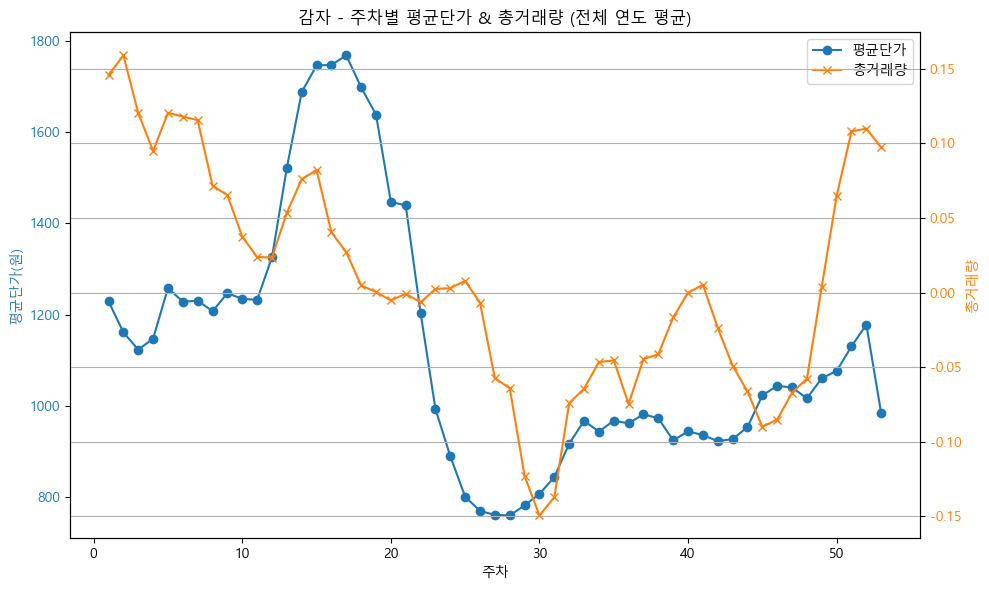

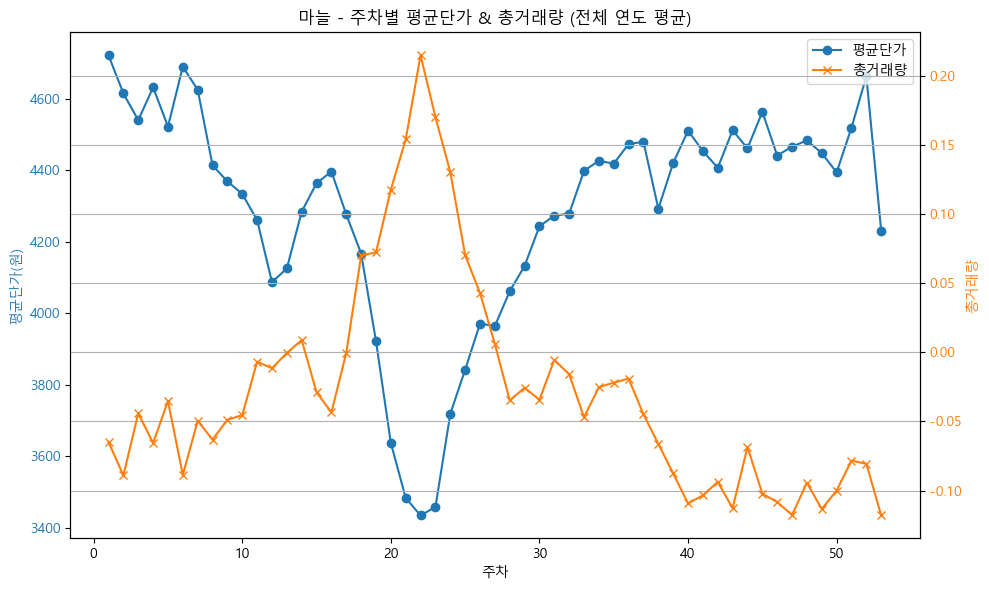

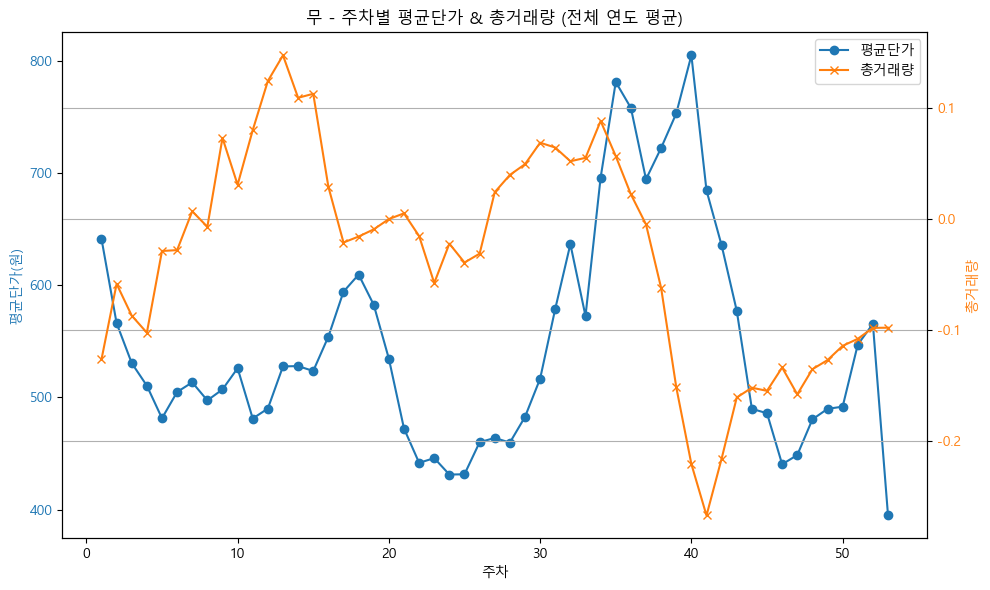

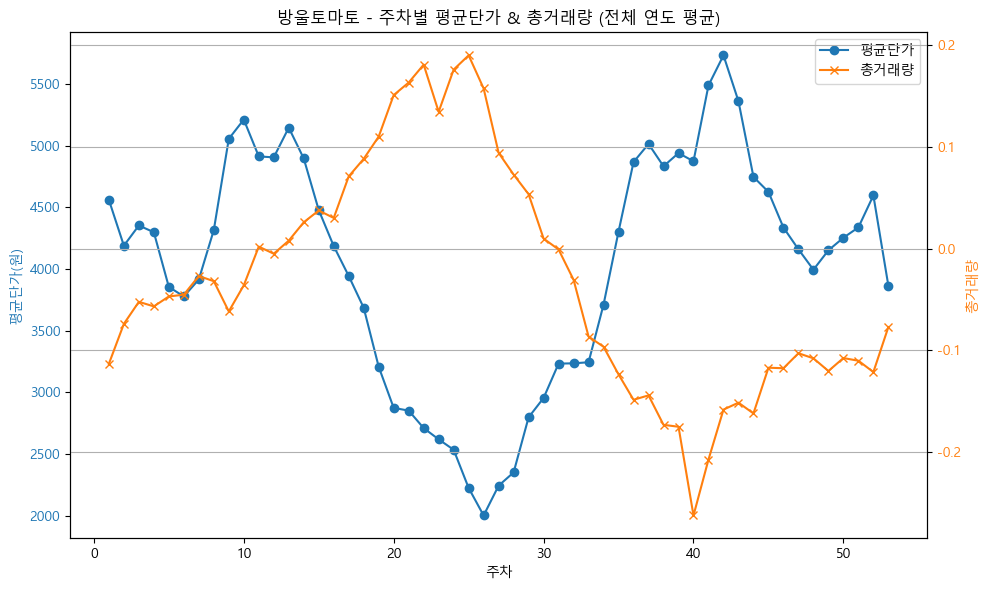

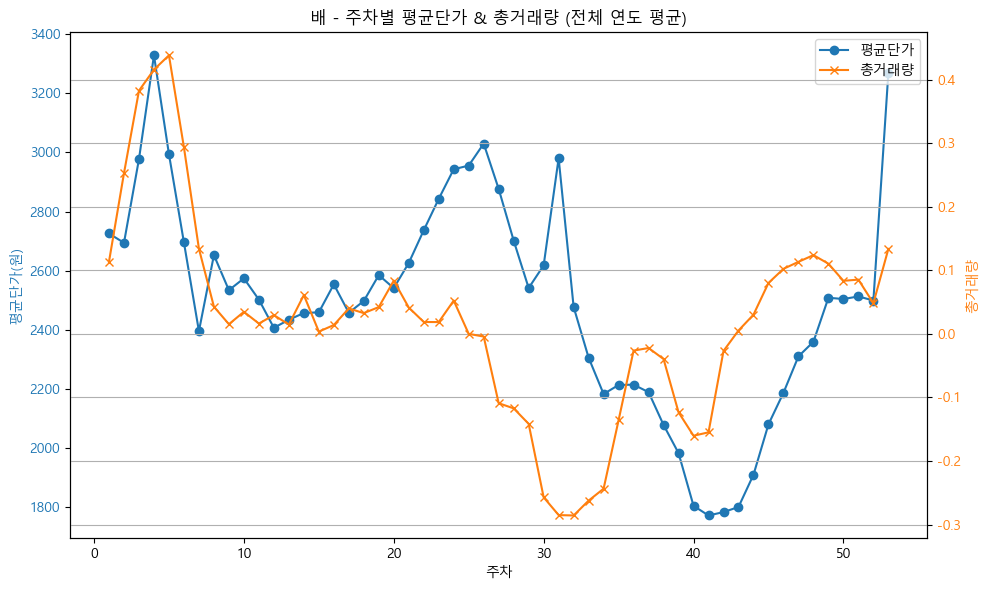

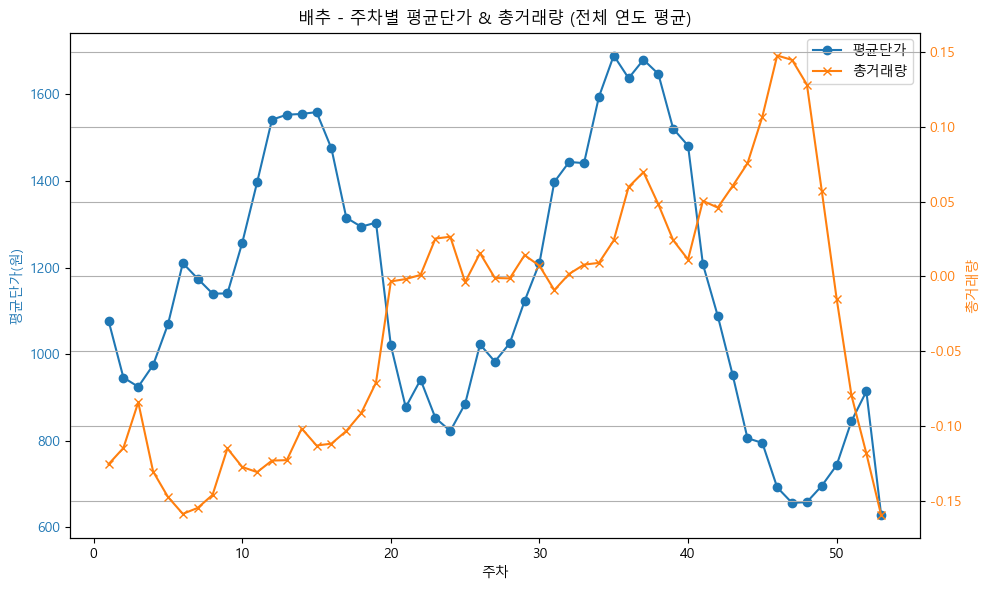

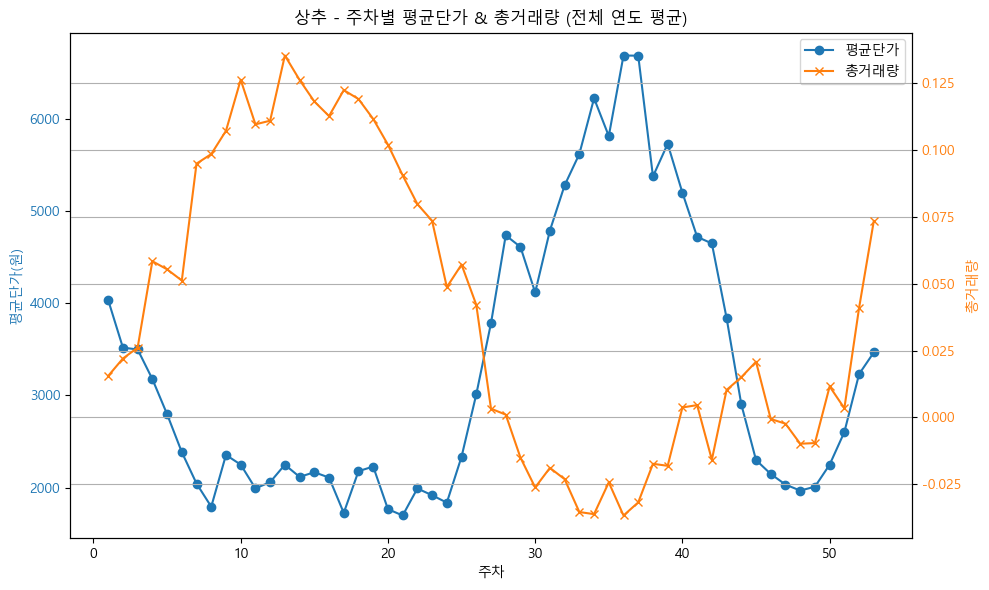

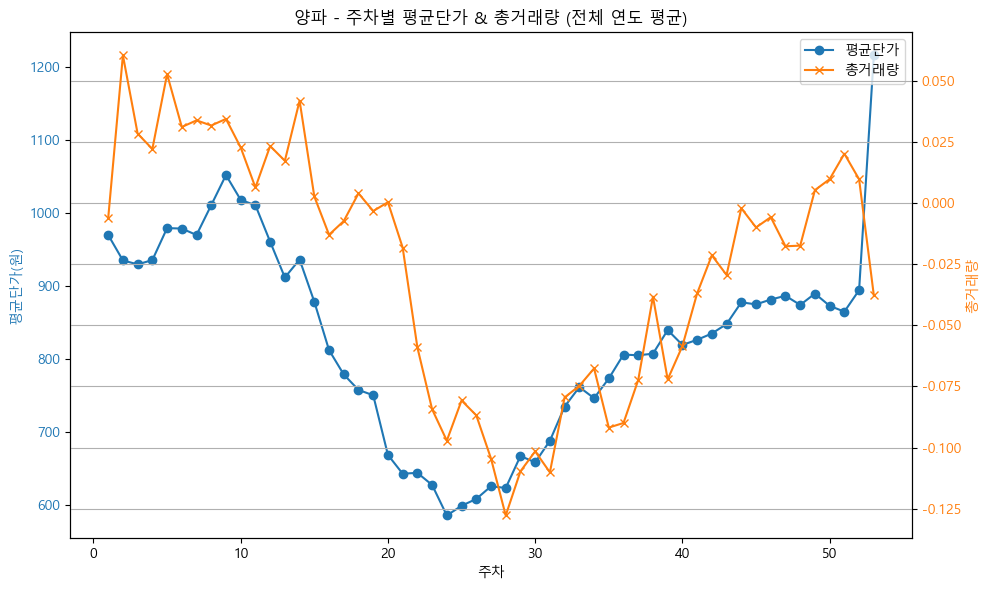

In [15]:
file_list = glob.glob('EDA/*.csv')

for file_path in file_list:
    try:
        df = pd.read_csv(file_path, encoding='cp949', parse_dates=['week_start'])

        df['week'] = df['week_start'].dt.isocalendar().week

        weekly_avg = df.groupby('week')[['평균단가(원)', '총거래량(kg)']].mean().reset_index()

        filename = os.path.basename(file_path)
        item_name = re.split(r'\(', filename)[0].strip()

        # 이중축 그래프
        fig, ax1 = plt.subplots(figsize=(10, 6))

        # 첫 번째 Y축 (평균단가)
        line1, = ax1.plot(weekly_avg['week'], weekly_avg['평균단가(원)'], color='tab:blue', marker='o', label='평균단가')
        ax1.set_xlabel("주차")
        ax1.set_ylabel("평균단가(원)", color='tab:blue')
        ax1.tick_params(axis='y', labelcolor='tab:blue')

        # 두 번째 Y축 (거래량)
        ax2 = ax1.twinx()
        line2, = ax2.plot(weekly_avg['week'], weekly_avg['총거래량(kg)'], color='tab:orange', marker='x', label='총거래량')
        ax2.set_ylabel("총거래량", color='tab:orange')
        ax2.tick_params(axis='y', labelcolor='tab:orange')
        
        # 범례 통합
        lines = [line1, line2]
        labels = [line.get_label() for line in lines]
        ax1.legend(lines, labels, loc='upper right')

        # 제목 및 레이아웃
        plt.title(f"{item_name} - 주차별 평균단가 & 총거래량 (전체 연도 평균)")
        fig.tight_layout()
        plt.grid(True)
        plt.show()

    except Exception as e:
        print(f"⚠️ 파일 처리 중 오류 발생: {file_path}")
        print(f"에러 내용: {e}")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 데이터 로드
df = pd.read_csv("감자/감자(EDA용)_스케일링만.csv", encoding='cp949', parse_dates=["week_start"])

plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False     # 음수 기호 깨짐 방지

df['year'] = df['week_start'].dt.year
df['month'] = df['week_start'].dt.month
df['week'] = df['week_start'].dt.isocalendar().week
df['dayofweek'] = df['week_start'].dt.dayofweek

In [3]:
# 타겟: 다음 주의 평균단가 예측
target_col = '평균단가(원)'
X = df.drop(columns=[target_col, 'week_start'])  # week_start는 시간 인덱스이므로 제외
y = df[target_col]

✅ 모델 학습 완료 (2024년까지)


In [4]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
for train_idx, test_idx in tscv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

In [8]:
for i, (train_idx, test_idx) in enumerate(tscv.split(df), 1):
    print(f"[Fold {i}]")
    print("Train 기간:", df.iloc[train_idx[0]]['week_start'], "→", df.iloc[train_idx[-1]]['week_start'])
    print("Test  기간:", df.iloc[test_idx[0]]['week_start'], "→", df.iloc[test_idx[-1]]['week_start'])

[Fold 1]
Train 기간: 2018-01-29 00:00:00 → 2019-03-25 00:00:00
Test  기간: 2019-03-25 00:00:00 → 2020-04-27 00:00:00
[Fold 2]
Train 기간: 2018-01-29 00:00:00 → 2020-04-27 00:00:00
Test  기간: 2020-04-27 00:00:00 → 2021-06-21 00:00:00
[Fold 3]
Train 기간: 2018-01-29 00:00:00 → 2021-06-21 00:00:00
Test  기간: 2021-06-21 00:00:00 → 2022-09-26 00:00:00
[Fold 4]
Train 기간: 2018-01-29 00:00:00 → 2022-09-26 00:00:00
Test  기간: 2022-09-26 00:00:00 → 2024-02-05 00:00:00
[Fold 5]
Train 기간: 2018-01-29 00:00:00 → 2024-02-05 00:00:00
Test  기간: 2024-02-05 00:00:00 → 2025-05-26 00:00:00


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
import numpy as np

model = RandomForestRegressor(n_estimators=100, random_state=42)
tscv = TimeSeriesSplit(n_splits=5)

mae_list, rmse_list, r2_list = [], [], []

for fold, (train_idx, test_idx) in enumerate(tscv.split(X), 1):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

    print(f"[Fold {fold}] MAE: {mae:.2f} | RMSE: {rmse:.2f} | R²: {r2:.4f}")

[Fold 1] MAE: 376.53 | RMSE: 479.51 | R²: 0.1619
[Fold 2] MAE: 237.22 | RMSE: 321.98 | R²: 0.6215
[Fold 3] MAE: 314.67 | RMSE: 427.18 | R²: 0.5527
[Fold 4] MAE: 208.51 | RMSE: 286.41 | R²: 0.8336
[Fold 5] MAE: 317.26 | RMSE: 405.08 | R²: 0.6609


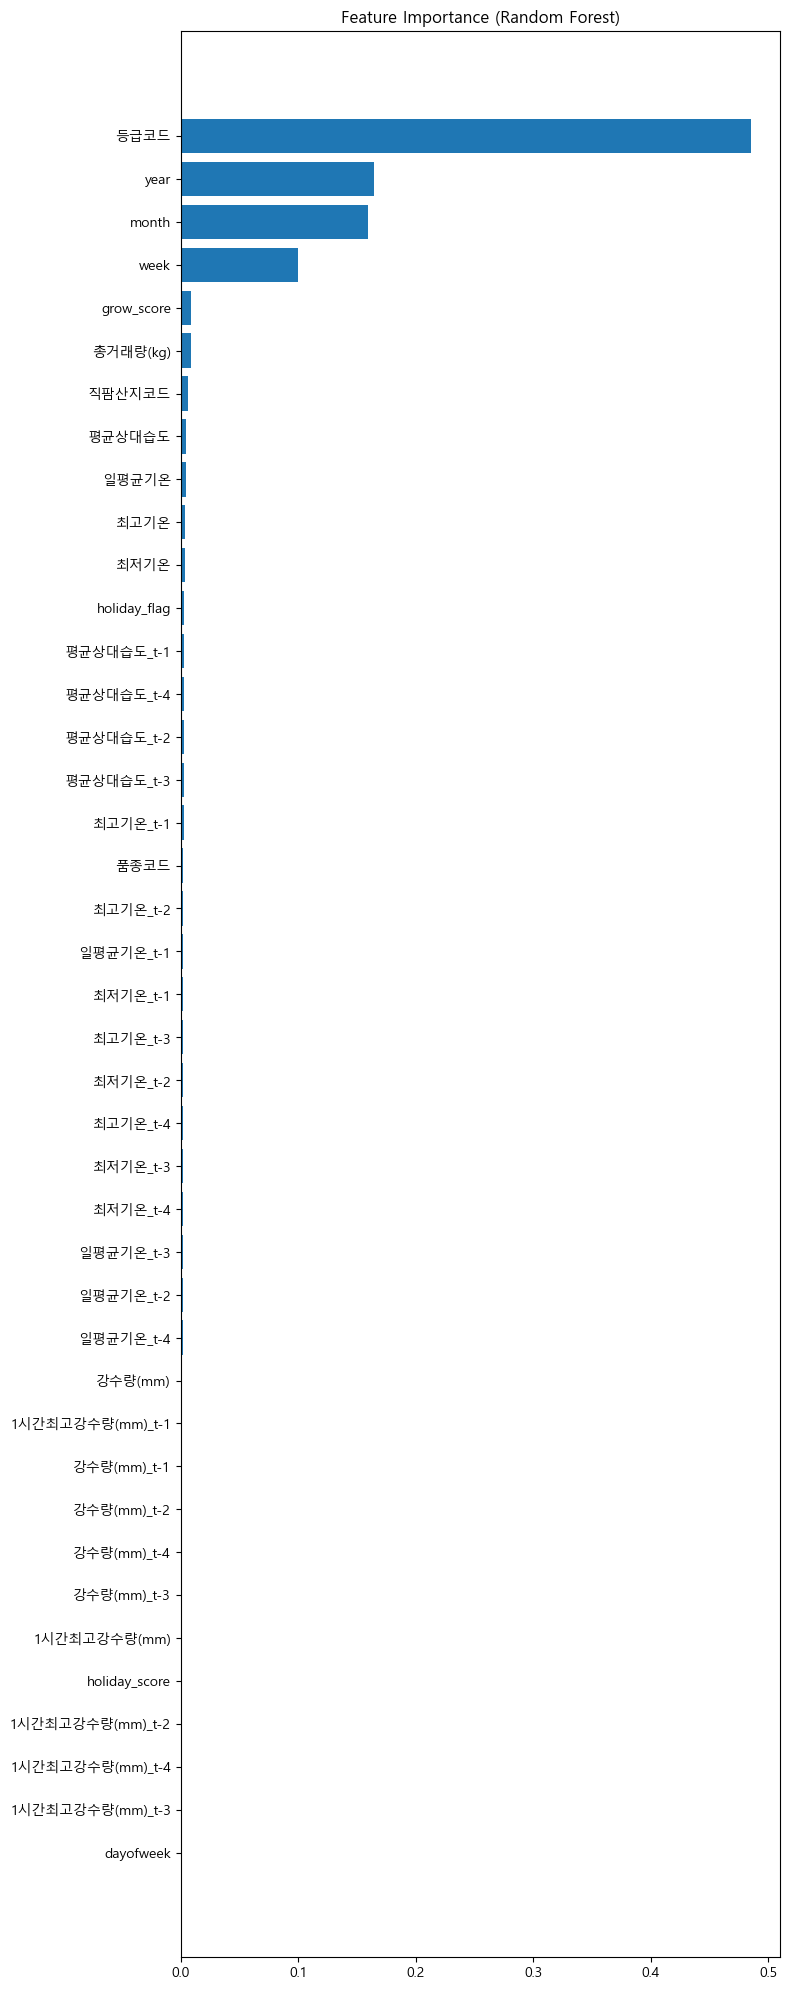

In [6]:
# 전체 데이터로 다시 학습
model.fit(X, y)

# 중요도 추출
importances = model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(importances)

# 시각화
plt.figure(figsize=(8, len(feature_names)//2))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import numpy as np
from xgboost import DMatrix, train
from scipy.sparse import csr_matrix

df = pd.read_csv("EDA/무(EDA용)_스케일링만.csv", encoding="cp949")

# 2. 시계열 파생 피처 생성 함수
def add_time_series_features(df):
    df = df.copy()

    # 주기성 인코딩
    df["sin_week"] = np.sin(2 * np.pi * df["week"] / 52)
    df["cos_week"] = np.cos(2 * np.pi * df["week"] / 52)

    # 이동 평균
    df = df.sort_index()  # week_start 기준
    df["avg_price_ma_3"] = df["평균단가(원)"].rolling(window=3, min_periods=1).mean()
    df["volume_ma_3"] = df["총거래량(kg)"].rolling(window=3, min_periods=1).mean()

    # 변화율
    df["avg_price_diff_1w"] = df["평균단가(원)"].diff()
    df["avg_price_pct_change_1w"] = df["평균단가(원)"].pct_change()
    df["volume_pct_change_1w"] = df["총거래량(kg)"].pct_change()

    # 시기 구분
    df["is_early_year"] = (df["week"] <= 20).astype(int)
    df["is_late_year"] = (df["week"] >= 40).astype(int)

    # 결측 제거
    df = df.dropna()
    return df

# 3. 전처리
df["week_start"] = pd.to_datetime(df["week_start"])
df = df.set_index("week_start")
df = add_time_series_features(df)

In [2]:
# 4. 타겟/입력 분리
y = df["평균단가(원)"]
X = df.drop(columns=["평균단가(원)"])
X = pd.get_dummies(X, columns=["품종코드", "직팜산지코드"])

# 5. 2025년 제외하고 학습용 데이터 구성
X_train = X[X["year"] <= 2024].drop(columns=["year", "week"])
y_train = y[X["year"] <= 2024]

In [4]:
# 6. 희소 행렬 변환 및 DMatrix 구성
X_train = X_train.astype(np.float32)
X_sparse = csr_matrix(X_train.values)
dtrain = DMatrix(X_sparse, label=y_train)

# 7. XGBoost 모델 학습
params = {
    "objective": "reg:squarederror",
    "eval_metric": "rmse",
    "max_depth": 6,
    "eta": 0.1,
    "seed": 42
}

model = train(params, dtrain, num_boost_round=100)

ValueError: could not convert string to float: '2018-01-29'

In [5]:
# 예측 결과 추가
df_train['예측값'] = model.predict(X_train)

# 주차별 집계
weekly_scores = (
    df_train.groupby(['year', 'week'])
    .apply(lambda g: pd.Series({
        'RMSE': mean_squared_error(g[target_col], g['예측값'], squared=False),
        'R2': r2_score(g[target_col], g['예측값']) if len(g) > 1 else None,
        '실제평균단가': g[target_col].mean(),
        '예측평균단가': g['예측값'].mean()
    }))
).reset_index()

print("\n📊 주차별 성능 미리보기:")
print(weekly_scores)
# weekly_scores.to_csv("주차별_성능평가.csv", index=False)  # 저장 원할 시


📊 주차별 성능 미리보기:
     year  week        RMSE        R2      실제평균단가      예측평균단가
0    2018     5  188.605049  0.130497  483.673469  567.726746
1    2018     6  228.885362  0.310084  653.503876  598.399536
2    2018     7  222.567658  0.296035  504.528662  558.385864
3    2018     8  332.779236  0.354411  584.676471  591.011719
4    2018     9  269.649998  0.371159  616.946667  596.469849
..    ...   ...         ...       ...         ...         ...
356  2024    48  392.719355  0.201473  984.356164  922.127747
357  2024    49  359.482327  0.281668  916.471349  883.748291
358  2024    50  323.382437  0.223010  801.357955  842.616638
359  2024    51  313.203562  0.207923  859.353659  867.570374
360  2024    52  273.134414  0.208599  910.484211  879.272522

[361 rows x 6 columns]


In [36]:
# 1. 전체 데이터 다시 불러오기
df_all = pd.read_csv("EDA/무_lag_학습용.csv", encoding='cp949')

# 3. 주차 기준 필터링: 2024년 22주차 ~ 2025년 22주차
test_mask = (((df_all['year'] == 2024) & (df_all['week'] >= 22)) |
             ((df_all['year'] == 2025) & (df_all['week'] <= 22)))
df_test = df_all[test_mask].copy()

# 4. 예측 대상 입력 준비 (숫자형만, target_col 제외)
target_col = '평균단가(원)'
X_test = df_test.drop(columns=[target_col]).select_dtypes(include=['number', 'bool'])
y_test = df_test[target_col]

# ✅ 기존에 학습한 모델을 그대로 사용해 예측
df_test['예측값'] = model.predict(X_test)

# 5. 성능 평가
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_test, df_test['예측값'], squared=False)
r2 = r2_score(y_test, df_test['예측값'])

print(f"✅ 예측 범위: 2024년 6월 ~ 2025년 5월")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

# 6. 주차별 RMSE/R2 확인
weekly_eval = (
    df_test.groupby(['year', 'week'])
    .apply(lambda g: pd.Series({
        '실제평균단가': g[target_col].mean(),
        '예측평균단가': g['예측값'].mean(),
        'RMSE': mean_squared_error(g[target_col], g['예측값'], squared=False),
        'R2': r2_score(g[target_col], g['예측값']) if len(g) > 1 else None
    }))
).reset_index()

print(weekly_eval.head())

✅ 예측 범위: 2024년 6월 ~ 2025년 5월
RMSE: 264.00
R² Score: 0.5068
   year  week      실제평균단가      예측평균단가       RMSE        R2
0  2024    22  670.625000  639.657776  83.051408  0.878149
1  2024    23  626.443243  626.654236  66.103951  0.904256
2  2024    24  583.186047  602.028809  73.100169  0.873409
3  2024    25  594.222892  600.340576  68.784116  0.861242
4  2024    26  581.800926  599.804443  68.764827  0.868698


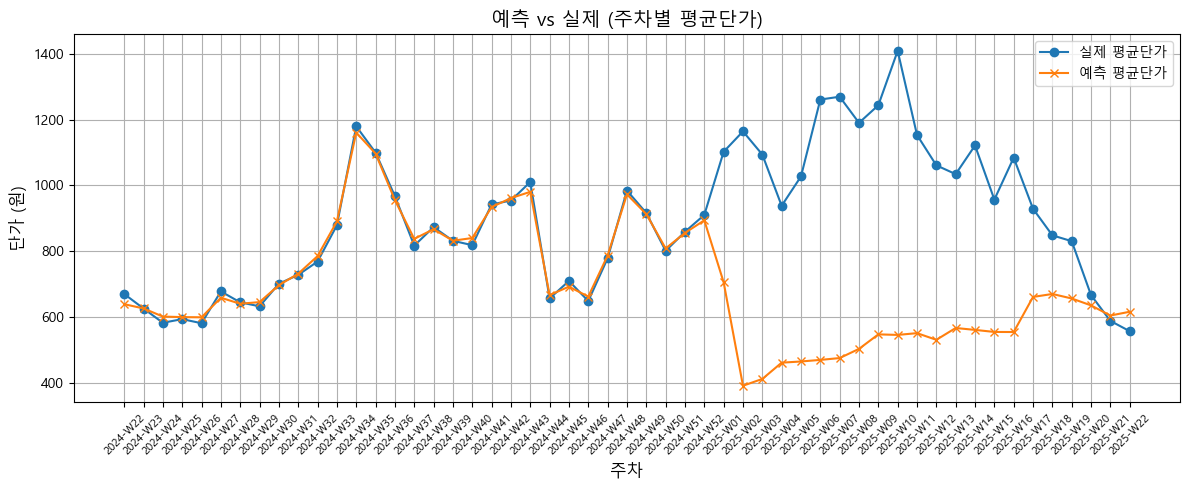

In [38]:
import matplotlib.pyplot as plt

# 1. 주차 단위로 평균 집계
df_plot = (
    df_test.groupby(['year', 'week'])[['평균단가(원)', '예측값']]
    .mean()
    .reset_index()
)

# 2. 주차 순서대로 x축 만들기 (연도 + 주차를 문자열로)
df_plot['주차'] = df_plot['year'].astype(str) + '-W' + df_plot['week'].astype(str).str.zfill(2)

# 3. 시각화
plt.figure(figsize=(12, 5))
plt.plot(df_plot['주차'], df_plot['평균단가(원)'], label='실제 평균단가', marker='o')
plt.plot(df_plot['주차'], df_plot['예측값'], label='예측 평균단가', marker='x')
plt.xticks(rotation=45, fontsize=8)
plt.title('예측 vs 실제 (주차별 평균단가)', fontsize=14)
plt.xlabel('주차', fontsize=12)
plt.ylabel('단가 (원)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

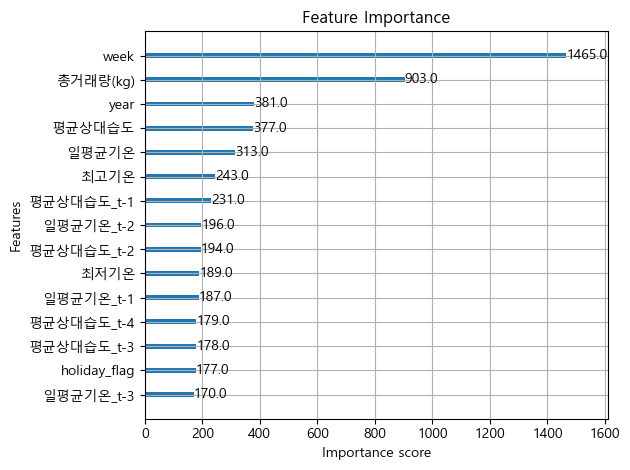

In [39]:
xgb.plot_importance(model, max_num_features=15)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

In [40]:
import shap
import numpy as np

# TreeExplainer 생성 (XGBoost 모델 기반)
explainer = shap.Explainer(model, X_test)

# SHAP 값 계산
shap_values = explainer(X_test)

 98%|===================| 11897/12079 [01:00<00:00]        

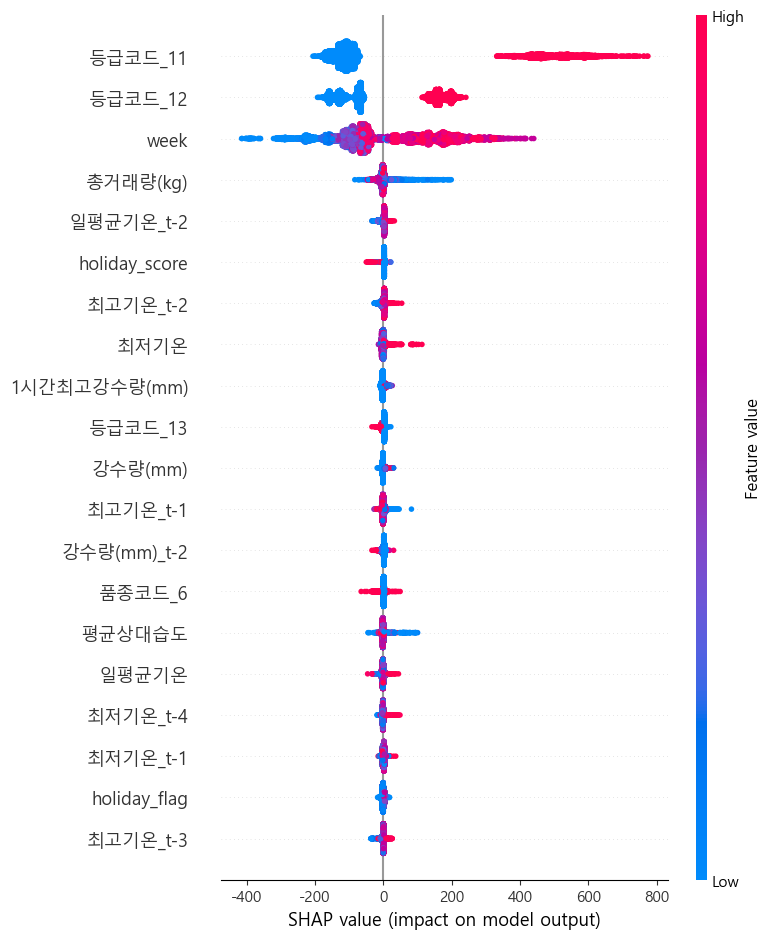

In [41]:
shap.summary_plot(shap_values, X_test)

In [43]:
import shap
shap.initjs()

shap.plots.force(shap_values[0])

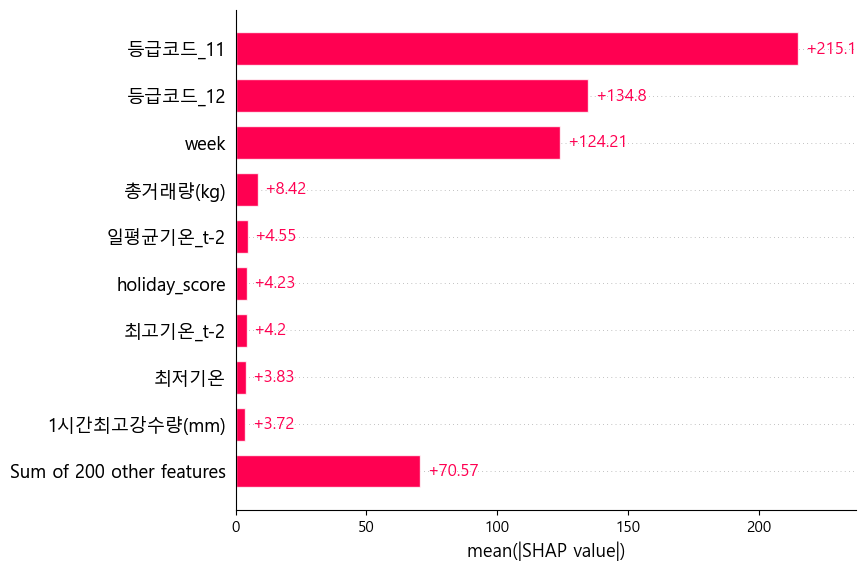

In [44]:
shap.plots.bar(shap_values)